## Import Libraries

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Question 1

In [2]:
table = [
    [31, 18],
    [13, 20],
    [23, 39],
    [46, 16],
    [20, 18],
    [14, 38],
    [17, 13],
    [47, 20],
    [13, 39],
    [45, 7]
]
cols = ['using aids', 'not using aids'] 

df = pd.DataFrame(table, columns=cols)

In [3]:
df

,using aids,not using aids
0,31,18
1,13,20
2,23,39
3,46,16
4,20,18
5,14,38
6,17,13
7,47,20
8,13,39
9,45,7


### mean and standard deviation

In [4]:
print("mean of table")
df.mean()

mean of table


using aids        26.9
not using aids    22.8
dtype: float64

In [5]:
print("standard deviation of table")
df.std()

standard deviation of table


using aids        14.247417
not using aids    11.593101
dtype: float64

### a. Hypothesis

- H0 : There is no significant effect of young adults were receive monetary aid to join workforce than not receive monetary aid
- H1 : There is significant effect of young adults were recieve monetary aid to join workforce than not receive monetary aid

In [6]:
h0 = "There is no significant effect of young adults were receive monetary aid to join workforce than not receive monetary aid"
h1 = "There is significant effect of young adults were recieve monetary aid to join workforce than not receive monetary aid"

### b. t-test

In [7]:
t_statistic, p_value = stats.ttest_ind(df['using aids'], df['not using aids'], equal_var=False)

In [8]:
t_statistic

0.7058598324591097

In [9]:
p_value

0.48968004037603874

### c. Significant differene

In [10]:
if p_value < 0.05:
    print(h1)
else:
    print(h0)

There is no significant effect of young adults were receive monetary aid to join workforce than not receive monetary aid


## Question 2

### 1. Exploratoy Data Analysis

In [11]:
df_meta = pd.read_csv("data/pdb_data_no_dups.csv")
df_seq = pd.read_csv("data/pdb_data_seq.csv")

#### Protein Meta Data

In [12]:
df_meta.columns

Index(['structureId', 'classification', 'experimentalTechnique',
       'macromoleculeType', 'residueCount', 'resolution',
       'structureMolecularWeight', 'crystallizationMethod',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'pdbxDetails', 'phValue', 'publicationYear'],
      dtype='object')

##### - Structure ID

<AxesSubplot:>

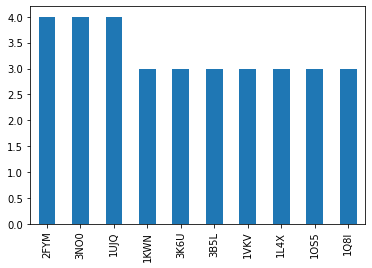

In [13]:
df_meta['structureId'].value_counts()[:10].plot(kind='bar')

In [17]:
temp = df_meta['structureId'].nunique() / len(df_meta)
print(f'Distribution of uniqueness of structureId Data {temp}')

Distribution of uniqueness of structureId Data 0.9965346779725744


StructureId is an Identifier code for strucutral protein for that dataset because of the percentage uniqueness and unique values  

##### - Classification

In [1]:
df_meta['structureId'].value_counts()[:10].plot(kind='bar')

NameError: name 'df_meta' is not defined

In [26]:
temp2

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
...,...,...,...,...,...
467299,9XIA,A,MNYQPTPEDRFTFGLWTVGWQGRDPFGDATRRALDPVESVQRLAEL...,388,Protein
467300,9XIM,A,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572,Protein
467301,9XIM,B,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572,Protein
467302,9XIM,C,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572,Protein


In [24]:
pd.merge(temp1, temp2, on='structureId', how='outer')

,structureId,classification,experimentalTechnique,macromoleculeType_x,residueCount_x,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence,residueCount_y,macromoleculeType_y
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,A,CCGGCGCCGG,20.0,DNA/RNA Hybrid
1,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,B,CCGGCGCCGG,20.0,DNA/RNA Hybrid
2,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,A,CGCGAATTCGCG,24.0,DNA
3,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,B,CGCGAATTCGCG,24.0,DNA
4,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154.0,Protein
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471806,9XIA,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),X-RAY DIFFRACTION,Protein,388,1.90,43542.29,NaN,NaN,2.79,55.93,NaN,NaN,1989.0,A,MNYQPTPEDRFTFGLWTVGWQGRDPFGDATRRALDPVESVQRLAEL...,388.0,Protein
471807,9XIM,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),X-RAY DIFFRACTION,Protein,1572,2.40,174722.12,NaN,NaN,3.96,68.92,NaN,NaN,1992.0,A,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572.0,Protein
471808,9XIM,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),X-RAY DIFFRACTION,Protein,1572,2.40,174722.12,NaN,NaN,3.96,68.92,NaN,NaN,1992.0,B,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572.0,Protein
471809,9XIM,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),X-RAY DIFFRACTION,Protein,1572,2.40,174722.12,NaN,NaN,3.96,68.92,NaN,NaN,1992.0,C,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572.0,Protein


Index(['structureId', 'classification', 'experimentalTechnique',
       'macromoleculeType', 'residueCount', 'resolution',
       'structureMolecularWeight', 'crystallizationMethod',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'pdbxDetails', 'phValue', 'publicationYear'],
      dtype='object')